In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray
%matplotlib inline

# Load GWCFD data

## Load the veritical profiles

In [2]:
D    = 27.0
x    = '1'

In [3]:
ablType = 'unstable'
simNomenclature = '5b'
fileToRead = '../../post_pro/turbine_'+ ablType+ simNomenclature+ '/lines/verLine_'+x+'D_U.xy'
print ("Reading file: %s"%fileToRead)
vertLine = pd.read_csv(fileToRead,
                    sep='\s+', skiprows=0, names=['z', 'U', 'V', 'W'])
#print (vertLine)

Reading file: ../../post_pro/turbine_unstable5b/lines/verLine_1D_U.xy


In [4]:
### The coordinates

In [5]:
nx   = 1
ny   = 2
nz   = len(vertLine)
nt   = 1

In [6]:
x_1d = np.zeros((nx)) + float(x)*D
y_1d = [0.0, 0.1]
#y_1d = [0.0]
z_1d = vertLine['z']
t_1d = [2000]
print (x_1d)
print (y_1d)
#print (z_1d)
print (t_1d)
Ux =  vertLine['V'] # Note that axial direction is along +y
Uy = -vertLine['U'] # spanwise is along -x
Uz =  vertLine['W']
#print (Ux)
#print (Uy)
#print (Uz)

[27.]
[0.0, 0.1]
[2000]


In [7]:
U = np.zeros((nt,nx,ny,nz))
V = np.zeros((nt,nx,ny,nz))
W = np.zeros((nt,nx,ny,nz))

In [8]:
#print (U[0][0][0])
#print (U[0][0][1][1:5])

In [9]:
U[0][0][0:ny] = Ux
V[0][0][0:ny] = Uy
W[0][0][0:ny] = Uz
#print (U[0][0][0])
print (U[0][0][0][1:5])
#print (V[0][0][0])
print (V[0][0][0][1:5])
#print (W[0][0][0])
print (W[0][0][0][1:5])

[4.43798991 5.04142564 5.34478828 5.55664186]
[-0.13753788 -0.13910651 -0.14264782 -0.153765  ]
[0.0026592  0.00357352 0.00201449 0.00482396]


In [10]:
print("Shape of U is {0}".format(U.shape))
print("Shape of V is {0}".format(V.shape))
print("Shape of W is {0}".format(W.shape))

Shape of U is (1, 1, 2, 150)
Shape of V is (1, 1, 2, 150)
Shape of W is (1, 1, 2, 150)


# Use xarray to create DataArrays, then Dataset

### The velocities

In [11]:
U = xarray.DataArray(data=U, 
                     dims=("t","x","y","z"), 
                     coords={"t":t_1d,"x":x_1d,"y":y_1d,"z":z_1d}, 
                     name="U",
                     attrs={"long_name":"streamwise wind component","units":"m/s"})

In [12]:
V = xarray.DataArray(data=V, 
                     dims=("t","x","y","z"), 
                     coords={"t":t_1d,"x":x_1d,"y":y_1d,"z":z_1d}, 
                     name="V",
                     attrs={"long_name":"cross-stream wind component","units":"m/s"})

In [13]:
W = xarray.DataArray(data=W, 
                     dims=("t","x","y","z"), 
                     coords={"t":t_1d,"x":x_1d,"y":y_1d,"z":z_1d}, 
                     name="W",
                     attrs={"long_name":"vertical wind component","units":"m/s"})

In [14]:
dataset = xarray.Dataset(data_vars={"U":U,"V":V,"W":W})

In [15]:
print(dataset)

<xarray.Dataset>
Dimensions:  (t: 1, x: 1, y: 2, z: 150)
Coordinates:
  * t        (t) int64 2000
  * x        (x) float64 27.0
  * y        (y) float64 0.0 0.1
  * z        (z) float64 0.0 1.342 2.685 4.027 5.369 ... 196.0 197.3 198.7 200.0
Data variables:
    U        (t, x, y, z) float64 6.095e-13 4.438 5.041 ... 8.437 8.446 8.455
    V        (t, x, y, z) float64 -3.732e-29 -0.1375 ... -0.0435 -0.04314
    W        (t, x, y, z) float64 0.0 0.002659 0.003574 ... 0.006535 0.006443


# See what it looks like

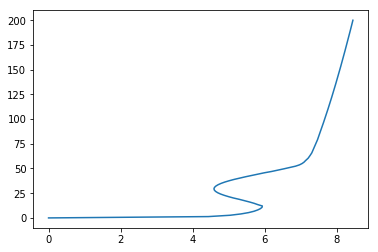

In [16]:
plt.plot(U.loc[t_1d[0],x_1d[0],y_1d[0],:], z_1d)

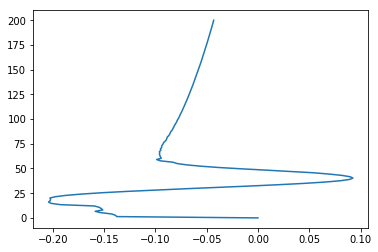

In [17]:
plt.plot(V.loc[t_1d[0],x_1d[0],y_1d[0],:], z_1d)

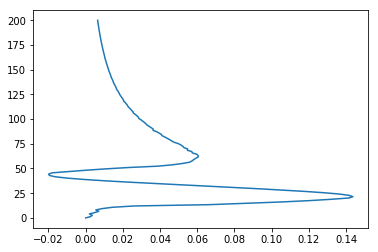

In [18]:
plt.plot(W.loc[t_1d[0],x_1d[0],y_1d[0],:], z_1d)

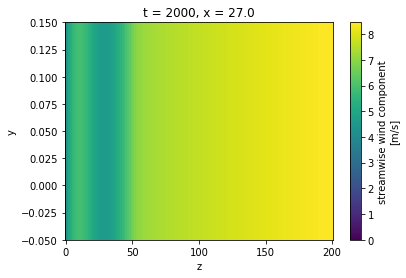

In [19]:
xarray.plot.pcolormesh(U.loc[t_1d[0],x_1d[0],:,:])

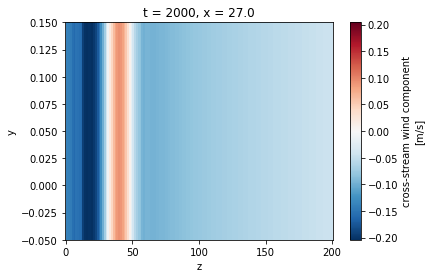

In [20]:
xarray.plot.pcolormesh(V.loc[t_1d[0],x_1d[0],:,:])

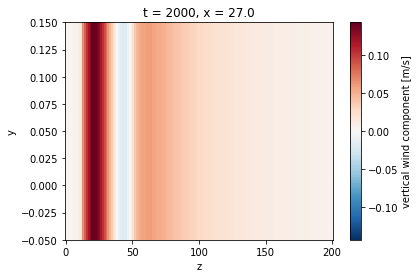

In [21]:
xarray.plot.pcolormesh(W.loc[t_1d[0],x_1d[0],:,:])

# Save as NetCDF

In [22]:
netcdf_path = os.path.join('../files_submitted','Phase2',ablType,'vertLine')
if not os.path.exists(netcdf_path):
        os.makedirs(netcdf_path)
dataset.to_netcdf(path=os.path.join(netcdf_path,'ENVISION_OXLEY_RANS_20190304_uvw_'+x+'D.nc'),mode='w')